<a href="https://colab.research.google.com/github/amitreddy/rutgers-datamining/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To open in colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/bellecp/3d726ac25505a076ab4c39b85db50c80/Homework3.ipynb)

In [ ]:
# netid: 
# name: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (21,12)
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["font.size"] = 24
plt.rcParams['lines.markersize'] = 10

# Exercise on reshape

Explain below why ``aa`` and ``aaa`` are different. That's way it is best to avoid ``reshape`` and use instead ``np.transpose``, ``np.swapaxes``, etc and ``np.newaxis`` to add axis of length 1 (https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it)

In [ ]:
a = np.array([[1.5, 1.6],
              [2.5, 2.6],
              [3.5, 3.6]])
a.shape

(3, 2)

In [ ]:
aa = a.T
aa

array([[1.5, 2.5, 3.5],
       [1.6, 2.6, 3.6]])

In [ ]:
aaa = a.reshape((2, 3))
aaa

array([[1.5, 1.6, 2.5],
       [2.6, 3.5, 3.6]])

# Problem: spinal bone mineral density measurements dataset

We will apply local polynomial regression to the following dataset:

<https://hastie.su.domains/ElemStatLearn/datasets/bone.info.txt>

<https://hastie.su.domains/ElemStatLearn/datasets/bone.data>

For convenience (and to show the reader how one can load data into the python pandas DataFrame), here is some code to load the dataset.

In [ ]:
import pandas as pd
df = pd.read_csv("https://hastie.su.domains/ElemStatLearn/datasets/bone.data", sep="\t")
df

,idnum,age,gender,spnbmd
0,1,11.70,male,0.018081
1,1,12.70,male,0.060109
2,1,13.75,male,0.005858
3,2,13.25,male,0.010264
4,2,14.30,male,0.210526
...,...,...,...,...
480,380,11.60,male,0.116368
481,381,9.80,female,0.097902
482,382,11.90,male,0.028986
483,383,11.20,male,-0.064103


In [ ]:
df_male = df[df.gender == "male"]
df_male

,idnum,age,gender,spnbmd
0,1,11.70,male,0.018081
1,1,12.70,male,0.060109
2,1,13.75,male,0.005858
3,2,13.25,male,0.010264
4,2,14.30,male,0.210526
...,...,...,...,...
473,367,14.65,male,0.049660
478,377,9.60,male,0.016978
480,380,11.60,male,0.116368
482,382,11.90,male,0.028986


<AxesSubplot:xlabel='age', ylabel='spnbmd'>

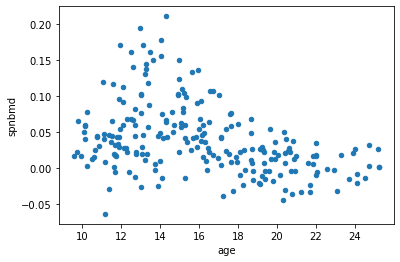

In [ ]:
df_male.plot.scatter(x="age", y="spnbmd")

In [ ]:
df_female = df[df.gender == "female"]
df_female

,idnum,age,gender,spnbmd
9,4,10.55,female,0.108043
10,4,11.50,female,0.219913
11,4,12.55,female,0.076641
12,5,12.75,female,0.096414
13,5,13.70,female,0.043817
...,...,...,...,...
476,374,15.15,female,0.013456
477,375,16.20,female,0.012124
479,379,13.60,female,0.050042
481,381,9.80,female,0.097902


<AxesSubplot:xlabel='age', ylabel='spnbmd'>

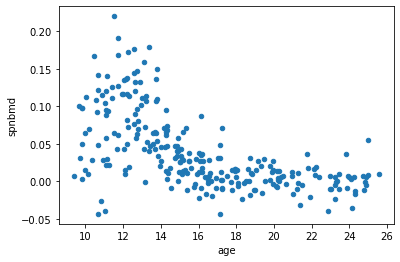

In [ ]:
df_female.plot.scatter(x="age", y="spnbmd")

<AxesSubplot:xlabel='age', ylabel='spnbmd'>

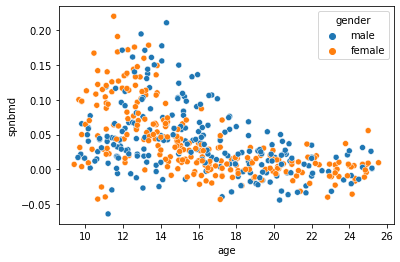

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x="age", y="spnbmd", hue="gender")

### Convert pandas DataFrame to numpy

One can easily convert a DataFrame into numpy arrays if needed.

In [ ]:
X_male = df_male['age'].to_numpy()
X_male.shape

(226,)

### Problem

The goal is to perform a local polynomial regression of the ``spnbmd`` column (the y-axis) onto age (the x-axis). See <https://hastie.su.domains/ElemStatLearn/datasets/bone.info.txt> on how the dataset was collected.

### Question 1
For each of the two datasets (the male dataset and the female dataset), split the dataset into a training (66.6%) and a test set (33.4%).

### Question 2

For each bandwidth parameter in ``[0.001*2**k for k in range(15)]``, and each polynomial degree ``m`` in ``[0, 1, 2, 3, 4, 6, 9, 12, 15]``, and each of the two kernel functions $D(t)=\exp(-t^2/2)$ and $D(t) = \sin(t)^2/t^2$, construct a local polynomial regression fit using the training set, and compute the test error on the test set. The  combination of bandwidth, polynomial degree and kernel function may be different on the two datasets (male dataset, female dataset).

The function $t\mapsto \sin(t)/t$ can be accesed in numpy with ``np.sinc(t)``.


### Question 3

In the same picture, plot 

- a scatter plot of the male dataset, and a scatter plot of the female dataset (in a different color)
- the local polynomial regression (with parameters tuned on the test set) for the male dataset on a grid of 200 points from 9.0 to 27.0
- a meaningful legend